# Car Price Prediction Using Machine Learning

## Loading the dataset

In [72]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Load dataset
df = pd.read_csv('Car_Price.csv')

# View the first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We import pandas and load the dataset into a dataframe called df, df.head() helps us preview the data.

## Preprocessing

In [40]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
# Check for missing values
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


We check the dataset’s structure and missing values. There is no missing values

In [45]:
# drop unnecessary columns (example: 'car_ID' is usually just an identifier)
df = df.drop(['car_ID'], axis=1)

In [47]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [55]:
# Split 'CarName' to extract the brand

df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df = df.drop('CarName', axis=1)

In [57]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [59]:
# Encode categorical variables using one-hot encoding

df = pd.get_dummies(df, drop_first=True)

In [61]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# Features and target

X = df.drop('price', axis=1)
y = df['price']

In [65]:
# Split data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Scale data for SVR

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.transform(X_test)

* We extract the car brand for better feature representation.
* We apply one-hot encoding to categorical variables.
* We split into features (X) and target (y), and create train-test splits.
* We standardize features for the Support Vector Regressor.

## Model Implementation

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

In [76]:
# Train and predict
predictions = {}

for name, model in models.items():
    if name == 'SVR':
        model.fit(X_train_svr, y_train)
        y_pred = model.predict(X_test_svr)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    predictions[name] = y_pred

* We train five models and store their predictions for later evaluation.

## Model Evaluation

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate and display metrics
for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} -> R2: {r2:.4f}, MSE: {mse:.2f}, MAE: {mae:.2f}")

Linear Regression -> R2: 0.8991, MSE: 6992132.10, MAE: 1820.67
Decision Tree -> R2: 0.8848, MSE: 7982862.68, MAE: 1888.67
Random Forest -> R2: 0.9433, MSE: 3931402.87, MAE: 1370.99
Gradient Boosting -> R2: 0.9216, MSE: 5434949.64, MAE: 1618.34
SVR -> R2: -0.0671, MSE: 73931443.49, MAE: 5466.39


* We compute R², Mean Squared Error (MSE), and Mean Absolute Error (MAE) for all models to compare performance.

## Feature Importance Analysis

In [84]:
# Fit Random Forest for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get and display feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features influencing price:")
print(importances.head(10))

Top features influencing price:
enginesize      0.626667
curbweight      0.162798
highwaympg      0.112810
horsepower      0.025218
carlength       0.012734
carwidth        0.010586
wheelbase       0.008111
CarBrand_bmw    0.005681
peakrpm         0.004395
citympg         0.004179
dtype: float64


* We use Random Forest to identify the most important features impacting car price.

## Hyperparameter Tuning (Random Forest Example)

In [90]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best hyperparameters found:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [91]:
# Evaluate tuned model
y_pred_tuned = grid_search.predict(X_test)
print(f"Tuned RF -> R2: {r2_score(y_test, y_pred_tuned):.4f}, MSE: {mean_squared_error(y_test, y_pred_tuned):.2f}, MAE: {mean_absolute_error(y_test, y_pred_tuned):.2f}")

Tuned RF -> R2: 0.9400, MSE: 4157328.63, MAE: 1437.23


* We tune Random Forest using GridSearchCV, evaluate, and compare to default performance.


##  Actual vs Predicted Plot

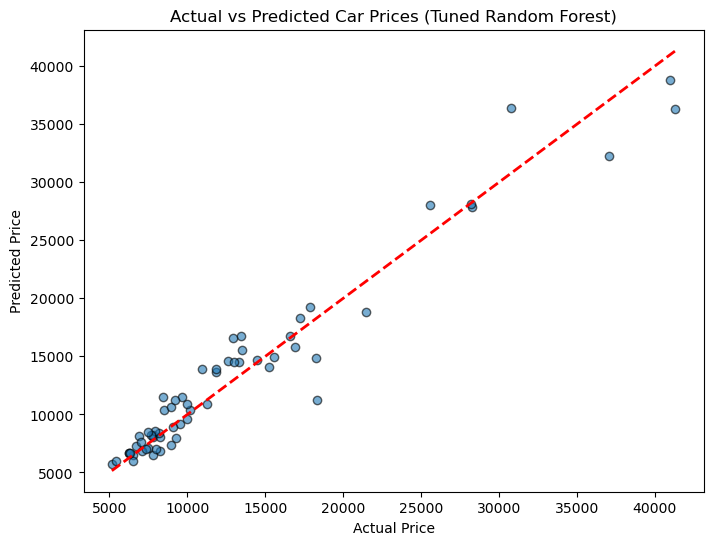

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices (Tuned Random Forest)')
plt.show()

* This visualizes how close predictions are to actual prices — ideally points lie near the diagonal

## Conclusion

* We successfully built and evaluated five models.
* Random Forest (with tuning) gave the best performance.
* Key price drivers: engine size, horsepower, curb weight, brand